**<font size="4">Obtaining Data & Necessary Libraries</font>**

In [1]:
#Import necessary libraries for obtaining, analyzing, visualizing data, creating ML models
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker 
import seaborn as sn
import sklearn 
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
#Gettign data from csv file on desktop, saved in the same folder as this notebook
df = pd.read_csv("issues_prs_repos.csv")
df.head()

,name,lftm_issues,lftm_prs,num_repos
0,1C Enterprise,5290,4935,264
1,ABAP,85136,109089,447
2,ActionScript,148750,96795,8739
3,Ada,247,480,2154
4,AGS Script,320,417,670


In [3]:
#Renaming columns for clarity
df.rename(columns={'name':'Language','lftm_issues':'Issues', 'lftm_prs':'Pull Requests', 'num_repos':'Repositories'}, inplace=True)
df.head()

,Language,Issues,Pull Requests,Repositories
0,1C Enterprise,5290,4935,264
1,ABAP,85136,109089,447
2,ActionScript,148750,96795,8739
3,Ada,247,480,2154
4,AGS Script,320,417,670


In [4]:
#Setting column Language to index
df = df.set_index('Language')
df.head()

,Issues,Pull Requests,Repositories
Language,,,
1C Enterprise,5290,4935,264
ABAP,85136,109089,447
ActionScript,148750,96795,8739
Ada,247,480,2154
AGS Script,320,417,670


**<font size="4">Exploring & Selecting Data</font>**

In [5]:
#show the discriptive statistics, displayign values up to the third significant digit
df.describe().applymap(lambda x: f"{x:0.3f}")

#Pull Requests has the largest mean, or most activity on GitHub
#Issues comes second, and Repositories 3rd

,Issues,Pull Requests,Repositories
count,158.000,158.000,158.000
mean,8216556.544,10155053.709,48137.177
std,31919571.481,39013309.545,150351.314
min,100.000,107.000,7.000
25%,6523.500,5300.250,848.000
50%,118605.000,114340.500,4232.500
75%,1159712.250,1369640.500,16846.250
max,279509718.000,323026578.000,1100421.000


In [6]:
#Let's look at what some of the top languages are in all areas to narrow our focus
#We will sort each one in descending order to see the top 30 Languages
Top_Issues = df.sort_values('Issues', ascending=False)
df_Issues=pd.DataFrame(Top_Issues['Issues']).head(30)
print(df_Issues.head(10))

Top_PR = df.sort_values('Pull Requests', ascending=False)
df_Pull=pd.DataFrame(Top_PR['Pull Requests']).head(30)
print(df_Pull.head(10))

Top_Repo = df.sort_values('Repositories', ascending=False)
df_Repo=pd.DataFrame(Top_Repo['Repositories']).head(30)
print(df_Repo.head(10))
#From the results we can observe, at first, that Issues and Requests have the same langauges listed
#If we view the entire table, rather than just the top 10 rows, we can see the list is not a complete match
#For Repositories, we can already observe that there is variation in the languages just from looking at the top 10

               Issues
Language             
JavaScript  279509718
Python      180276683
Java        152051010
PHP          96345155
C++          83463172
TypeScript   71405313
Go           67459678
C#           59130078
Ruby         55582961
C            42128352
            Pull Requests
Language                 
JavaScript      323026578
Python          253883739
Java            160463616
Ruby            121277814
PHP             106413734
Go               98477982
C++              92274560
TypeScript       81755312
C#               50816884
HTML             48391480
            Repositories
Language                
JavaScript       1100421
CSS               813443
HTML              779549
Shell             638068
Python            548870
Ruby              374802
Java              369282
PHP               339901
C                 292000
C++               278066


In [7]:
#To narrow down the list further to the langauges that are common across all three variables, we will merge them
#We will conduct the merge starting with the two variables with he most activity 
df_PullIssues = pd.merge(df_Pull, df_Issues, left_index=True, right_index=True)
df_PullIssues.head()

,Pull Requests,Issues
Language,,
JavaScript,323026578,279509718
Python,253883739,180276683
Java,160463616,152051010
Ruby,121277814,55582961
PHP,106413734,96345155


In [8]:
#With the newly created table, we will now merge the Repositories
Top_Github = pd.merge(df_PullIssues, df_Repo, left_index=True, right_index=True)
Top_Github
#This merge cuts down the list tot he top 20 languages across all variables

,Pull Requests,Issues,Repositories
Language,,,
JavaScript,323026578,279509718,1100421
Python,253883739,180276683,548870
Java,160463616,152051010,369282
Ruby,121277814,55582961,374802
PHP,106413734,96345155,339901
Go,98477982,67459678,91119
C++,92274560,83463172,278066
TypeScript,81755312,71405313,46332
C#,50816884,59130078,133013


In [9]:
#An alternative, better way to get the same results as above, faster and cleaner
Github = [df_Pull, df_Issues, df_Repo]
Top_Github_Alt= (pd.concat(Github, axis=1)).dropna()
Top_Github_Alt

,Pull Requests,Issues,Repositories
Language,,,
JavaScript,323026578.0,279509718.0,1100421.0
Python,253883739.0,180276683.0,548870.0
Java,160463616.0,152051010.0,369282.0
Ruby,121277814.0,55582961.0,374802.0
PHP,106413734.0,96345155.0,339901.0
Go,98477982.0,67459678.0,91119.0
C++,92274560.0,83463172.0,278066.0
TypeScript,81755312.0,71405313.0,46332.0
C#,50816884.0,59130078.0,133013.0


In [10]:
Top_Github_Alt.describe().applymap(lambda x: f"{x:0.3f}")

,Pull Requests,Issues,Repositories
count,20.000,20.000,20.000
mean,75070355.800,60922248.800,314200.800
std,86468292.363,71121886.130,311673.052
min,3831778.000,4105280.000,29898.000
25%,12730829.500,11451322.000,63207.750
50%,46285958.000,35883729.000,223036.500
75%,100461920.000,74419777.750,418319.000
max,323026578.000,279509718.000,1100421.000


**<font size="4">Visualizing the Data</font>**

**Scatter Plot**

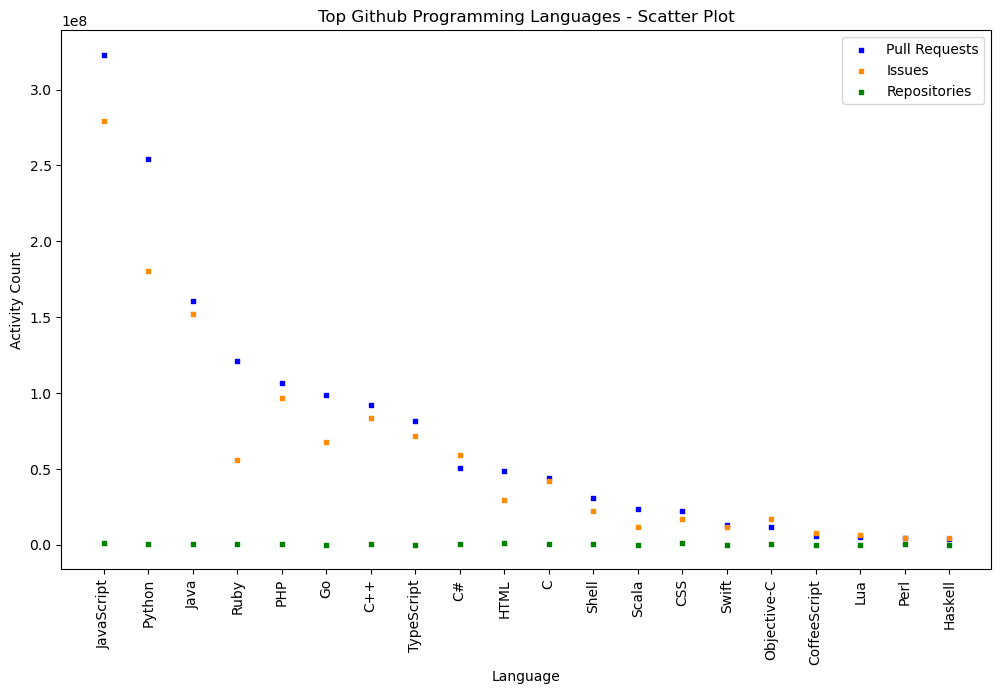

In [25]:
#Issues data
x1 = Top_Github_Alt.index
y1 = Top_Github_Alt['Pull Requests']
 
# Pullt Request data
x2 = Top_Github_Alt.index
y2 = Top_Github_Alt['Issues']

# dataset2
x3 = Top_Github_Alt.index
y3 = Top_Github_Alt['Repositories']
 
plt.scatter(x1, y1, c ='blue', 
            marker ='s', 
            s = 10)
plt.scatter(x2, y2, c ='darkorange', 
            marker ='s', 
            s = 10)
plt.scatter(x3, y3, c ='green', 
            marker ='s', 
            s = 10)

plt.xlabel('Language')
plt.ylabel('Activity Count')
plt.title('Top Github Programming Languages - Scatter Plot')

plt.tick_params(axis='x', labelrotation = 90)
plt.legend(['Pull Requests','Issues','Repositories'])
plt.rcParams["figure.figsize"] = (12,7)
plt.show()

**Bar Chart - Side by Side**

Text(0.5, 1.0, 'Top Github Programming Languages - Bar Chart')

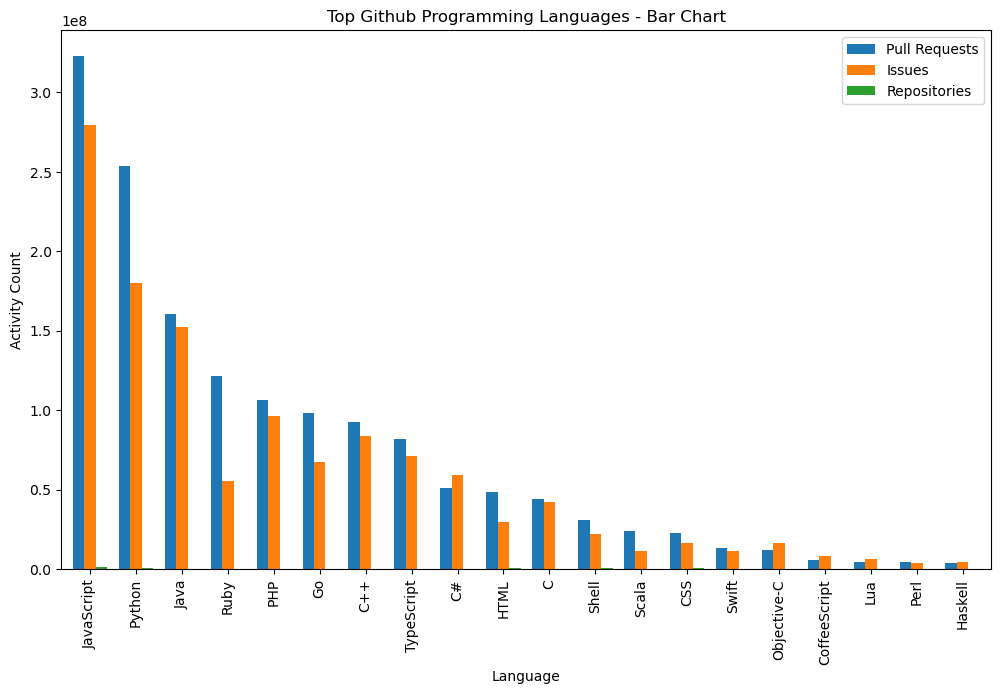

In [12]:
Top_Github_Alt.plot(y=['Pull Requests', 'Issues', 'Repositories'], kind="bar", width=(0.75))
plt.xlabel('Language')
plt.ylabel('Activity Count')
plt.title('Top Github Programming Languages - Bar Chart')

**Horizontal Side by Side Bar Chart**

Text(0.5, 1.0, 'Top Github Programming Languages - Horizontal Bar Chart')

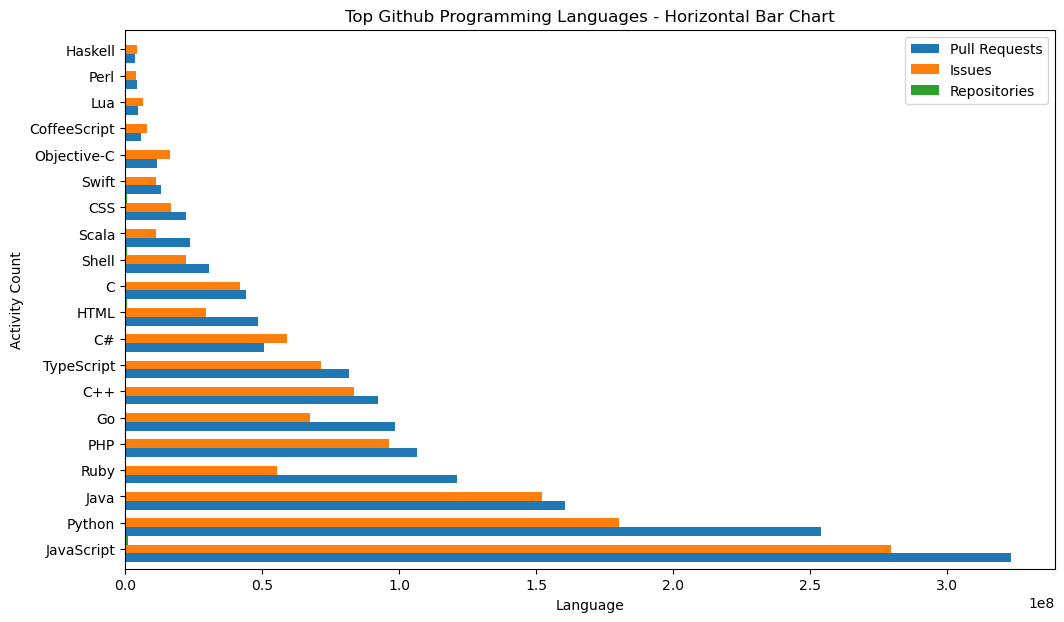

In [13]:
#To visualize the graph horizontaliy instead
ax = Top_Github_Alt.plot.barh(width=(1))
plt.xlabel('Language')
plt.ylabel('Activity Count')
plt.title('Top Github Programming Languages - Horizontal Bar Chart')

**Overlapping Bar Chart**

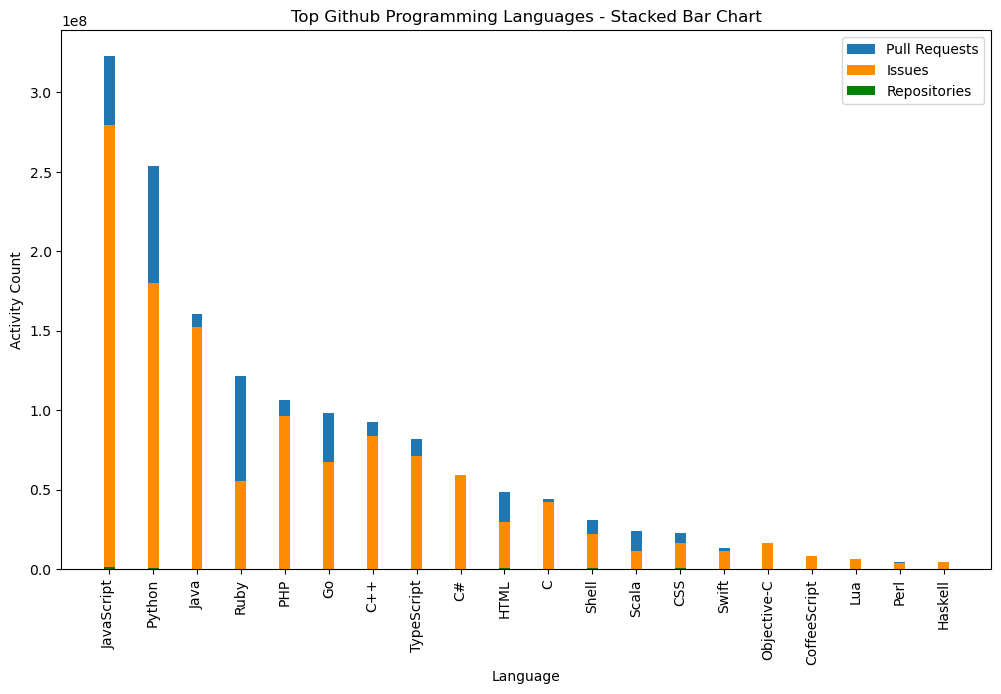

In [14]:
#In both of the visualizations above it was difficult to see the Repositories data
#Lets try an overlapping bar chart/graph to see if it is any better
ax = plt.subplot()
ax.bar(Top_Github_Alt.index, Top_Github_Alt['Pull Requests'], width=(0.25)) 
ax.bar(Top_Github_Alt.index, Top_Github_Alt['Issues'], color=("darkorange"), width=(0.25)) 
ax.bar(Top_Github_Alt.index, Top_Github_Alt['Repositories'], color="green", width=(0.25)) 

#To correct x-label text display
ax.tick_params(axis='x', labelrotation = 90)
plt.xlabel('Language')
plt.ylabel('Activity Count')
plt.title('Top Github Programming Languages - Stacked Bar Chart')
ax.legend(['Pull Requests','Issues','Repositories'])

**Horizontal Stacked Bar Chart**

Text(0.5, 1.0, 'Top Github Programming Languages - Horizontal Stacked Bar Chart')

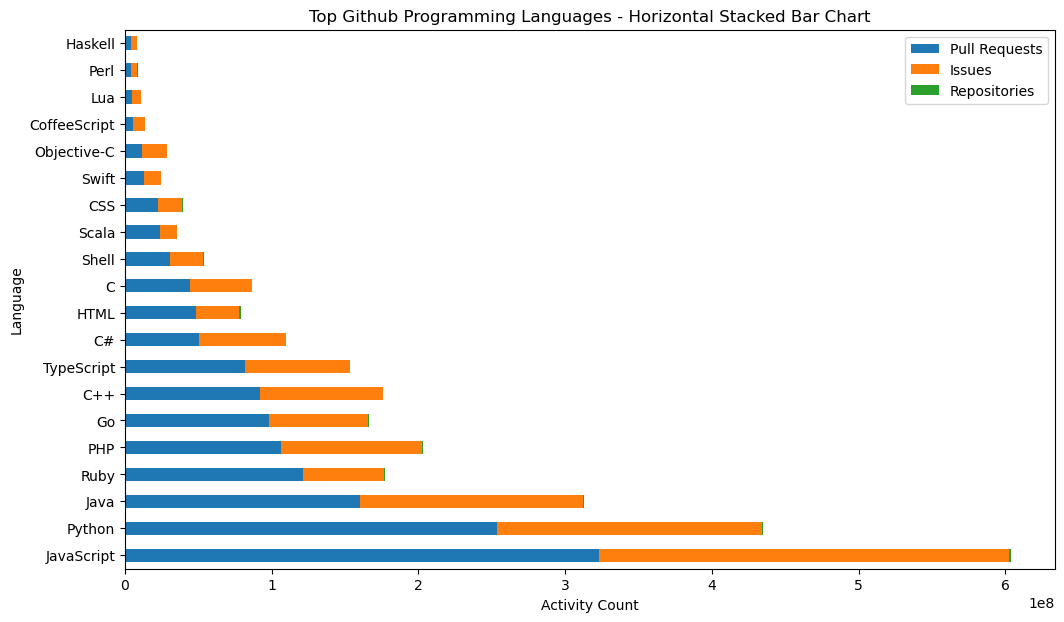

In [15]:
#While the above is slightly better, let's see if a stacked chart/graph improves it
ax = Top_Github_Alt.plot(y=['Pull Requests', 'Issues', 'Repositories'], kind="barh", rot=0, stacked=True)
_ = ax.legend(loc='upper right')
plt.xlabel('Activity Count')
plt.ylabel('Language')
plt.title('Top Github Programming Languages - Horizontal Stacked Bar Chart')

**Horizontal Bar Chart w/ Single Variable/Column Data**

Text(0.5, 1.0, 'Top Github Programming Languages (Repositories)- Bar Chart')

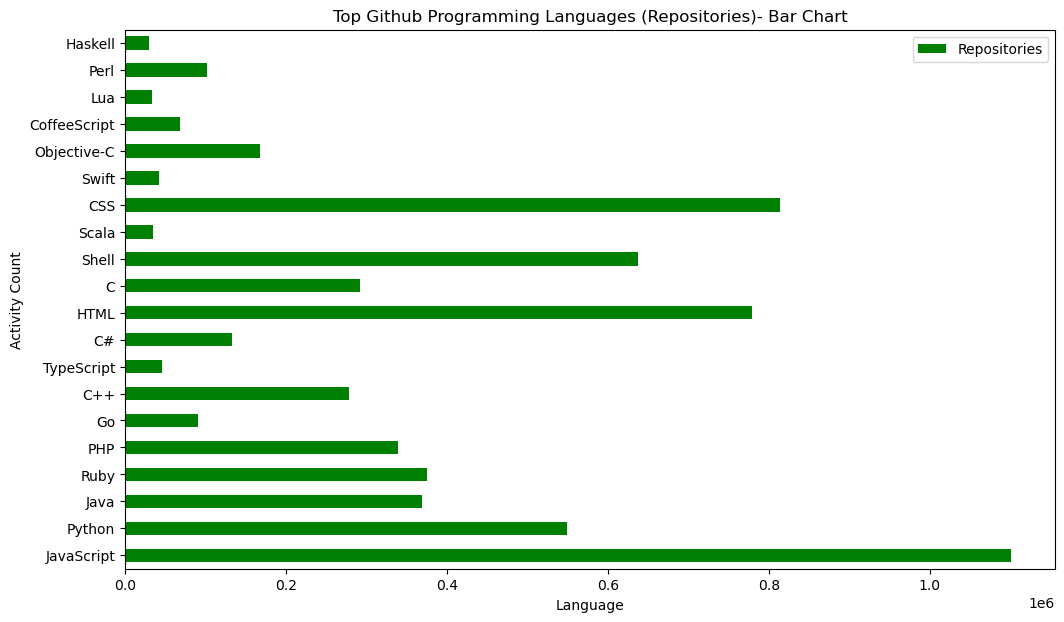

In [16]:
#Not much of a difference, but the placement on top of the other variable data improves visibility
#The vast difference in activity count of Issues and Pull requests, in comparing to number of repositories
#It is challanging to create a visual with all three variables
#Let's create a visual for just repositories for clarity on what this particular data looks like
Top_Github_Alt.plot(y= 'Repositories', kind="barh", color='green', width=(0.5))
plt.xlabel('Language')
plt.ylabel('Activity Count')
plt.title('Top Github Programming Languages (Repositories)- Bar Chart')

**<font size="4">Setting Up for Unsupervised Machine Learning</font>**

**Standardize the Data**

In [17]:
#Standardize the data using StandardScaler, adding transformed data to table
scaler = StandardScaler()
Top_Github_Alt[['T_Issues','T_Pull Requests','T_Repositories']]= scaler.fit_transform(Top_Github_Alt[['Issues','Pull Requests','Repositories']])
Top_Github_Alt.head()

,Pull Requests,Issues,Repositories,T_Issues,T_Pull Requests,T_Repositories
Language,,,,,,
JavaScript,323026578.0,279509718.0,1100421.0,3.153263,2.942093,2.588112
Python,253883739.0,180276683.0,548870.0,1.721763,2.121687,0.772494
Java,160463616.0,152051010.0,369282.0,1.314590,1.013223,0.181319
Ruby,121277814.0,55582961.0,374802.0,-0.077023,0.548269,0.199490
PHP,106413734.0,96345155.0,339901.0,0.510998,0.371901,0.084601


**<font size="4">Optimal Clusters - Elbow Method</font>**

In [18]:
#Create a function using list creation and for loop to create the data for the elbow plot
def optimize_k_means (data, max_k):
    means=[]
    inertias=[]
    for k in range(1, max_k):
        kmeans=KMeans(n_clusters=k)
        kmeans.fit(data)
        means.append(k)
        inertias.append(kmeans.inertia_)
    fig=plt.subplots(figsize=(10,5))
    plt.plot(means, inertias, 'o-')       
    plt.title(' Elbow Method')
    plt.xlabel('Clusters(k)')
    plt.ylabel('WCSS_List')
    plt.show

C:\Users\nvbel\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


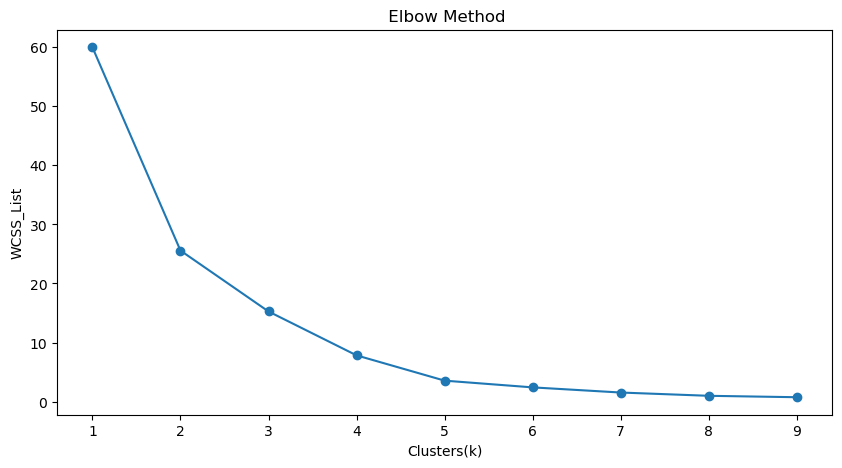

In [19]:
   optimize_k_means(Top_Github_Alt[['T_Issues','T_Pull Requests','T_Repositories']], 10)

C:\Users\nvbel\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

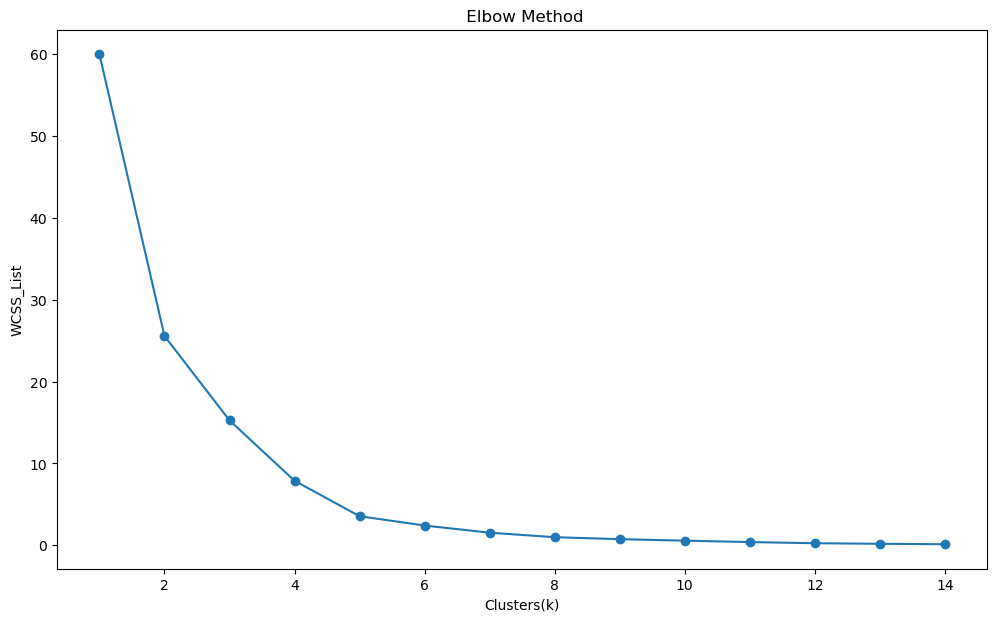

In [20]:
#Another way to perform the Elbow Method to identify the optimal number of clusters
#using a for loop again, but this doe snot use the transformed variable values

x = Top_Github_Alt[['T_Issues','T_Pull Requests','T_Repositories']]
wcss = []

for i in range(1,15):
        kmeans = KMeans(n_clusters=i, init='k-means++', n_init=15, max_iter=300, random_state=0)
        kmeans.fit(x)
        wcss.append(kmeans.inertia_)
plt.plot(range(1,15),wcss,'o-')
plt.title(' Elbow Method')
plt.xlabel('Clusters(k)')
plt.ylabel('WCSS_List')
plt.show

**<font size="4">K-Means Clustering </font>**

In [21]:
#Create the kmeans objects and fit them to the dataset
#Inputing chosen optimal cluster value given by the Elbow Method
kmeans = KMeans(n_clusters=3)
kmeans.fit(Top_Github_Alt[['T_Issues','T_Pull Requests','T_Repositories']])

KMeans(n_clusters=3)

In [22]:
#To see which cluster the Language has been added to, we can add a column with the kmeans values
Top_Github_Alt['KMeans_3']=kmeans.labels_
Top_Github_Alt

,Pull Requests,Issues,Repositories,T_Issues,T_Pull Requests,T_Repositories,KMeans_3
Language,,,,,,,
JavaScript,323026578.0,279509718.0,1100421.0,3.153263,2.942093,2.588112,0
Python,253883739.0,180276683.0,548870.0,1.721763,2.121687,0.772494,0
Java,160463616.0,152051010.0,369282.0,1.314590,1.013223,0.181319,0
Ruby,121277814.0,55582961.0,374802.0,-0.077023,0.548269,0.199490,2
PHP,106413734.0,96345155.0,339901.0,0.510998,0.371901,0.084601,2
Go,98477982.0,67459678.0,91119.0,0.094307,0.277740,-0.734350,2
C++,92274560.0,83463172.0,278066.0,0.325167,0.204134,-0.118950,2
TypeScript,81755312.0,71405313.0,46332.0,0.151225,0.079319,-0.881782,2
C#,50816884.0,59130078.0,133013.0,-0.025853,-0.287776,-0.596442,2


**<font size="4">Visualizing Cluster Results</font>**

<function matplotlib.pyplot.show(close=None, block=None)>

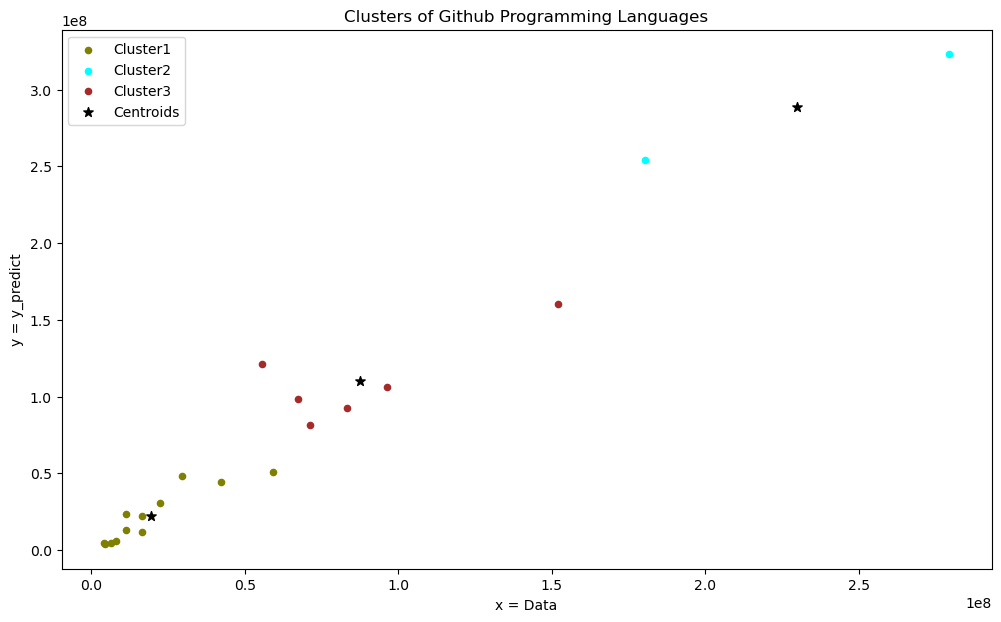

In [23]:
#Plot the graph to visualize the clusters
#x is defined above
data = Top_Github_Alt[['Issues','Pull Requests', 'Repositories']].values
y_predict = kmeans.fit_predict(data)
plt.scatter(data[y_predict == 0,0], data[y_predict == 0 ,1], s=20, c='olive', label = 'Cluster1')
plt.scatter(data[y_predict == 1,0], data[y_predict == 1 ,1], s=20, c='cyan', label = 'Cluster2')
plt.scatter(data[y_predict == 2,0], data[y_predict == 2 ,1], s=20, c='brown', label = 'Cluster3')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], marker='*', s=50, c = 'black', label = 'Centroids')
plt.title('Clusters of Github Programming Languages')
plt.xlabel('x = Data')
plt.ylabel('y = y_predict')
plt.legend()
plt.show

In [24]:
#By clustering the data we are able to see the top language activity in Github
#Python and JavaScript have unmatached activity levels compared to others
#Java, Ruby, PHP, Go, C++, TypeScript follow in the next cluster

#As an aspiring data analyst, this information begins to show me the top language to perfect
#These languages are not specific to data analysts
#Based on my own bootcamp experience and awareness of needed skills for data analysts
#For the second cluster, Python would be the lanaguge to focus on for the data field
#The third cluster would be HTML
#The first cluster would be Ruby
#My goal based on this data and model alone would be to work on perfecting my Python skills
#Once those have been mastered, based on the activity values, Ruby should perhaps be next